In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df =pd.read_csv('Employee.csv')
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [10]:
df.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [11]:
df['Education'].value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

Text(0.5, 1.0, 'Diagram from Degree Convention')

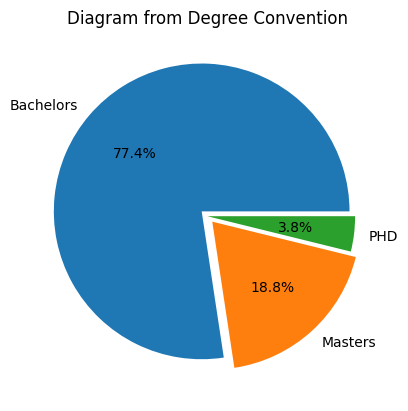

In [12]:
plt.pie(x= df['Education'].value_counts(), labels=df['Education'].value_counts().index, autopct= '%1.1f%%', explode=[0.05, 0.05, 0], startangle=360)
plt.title("Diagram from Degree Convention")

Text(0.5, 1.0, 'Gender Distribution within Workforce')

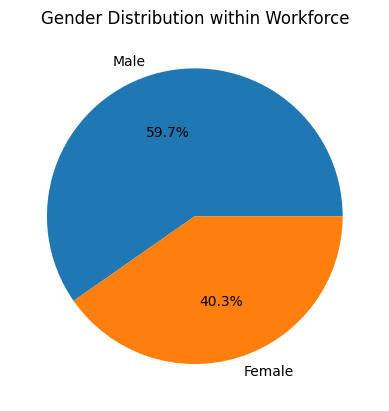

In [13]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender']. value_counts().index, autopct='%1.1f%%')
plt.title("Gender Distribution within Workforce")

In [14]:
le= LabelEncoder()
df['Education']= le.fit_transform(df['Education'])
df['City']= le.fit_transform(df['City'])
df['Gender']= le.fit_transform(df['Gender'])
df['EverBenched']= le.fit_transform(df['EverBenched'])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [15]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


<Figure size 1400x1000 with 0 Axes>

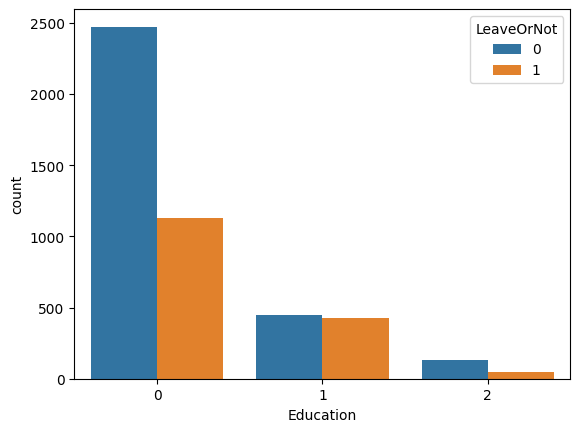

<Figure size 1400x1000 with 0 Axes>

In [20]:
sns.countplot(x='Education', hue = 'LeaveOrNot', data= df)
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

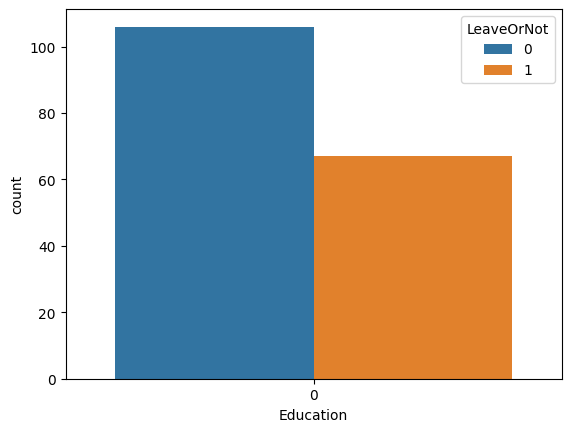

<Figure size 1400x1000 with 0 Axes>

In [16]:
sns.countplot(x = 'Education', hue = 'LeaveOrNot', data = df.loc[(df.Education == 0) & (df.PaymentTier == 1)])
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

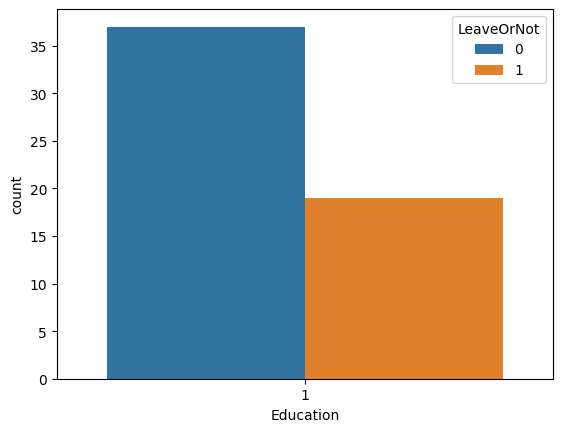

<Figure size 1400x1000 with 0 Axes>

In [22]:
sns.countplot(x = 'Education', hue = 'LeaveOrNot', data = df.loc[(df.Education == 1) & (df.PaymentTier == 1)])
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

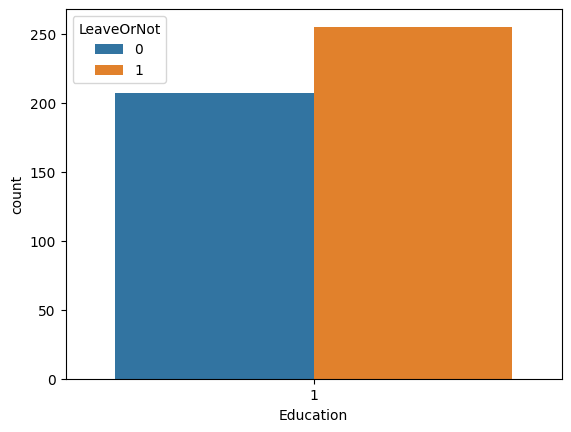

<Figure size 1400x1000 with 0 Axes>

In [17]:
sns.countplot(x = 'Education', hue = 'LeaveOrNot', data = df.loc[(df.Education == 1) & (df.PaymentTier == 3)])
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

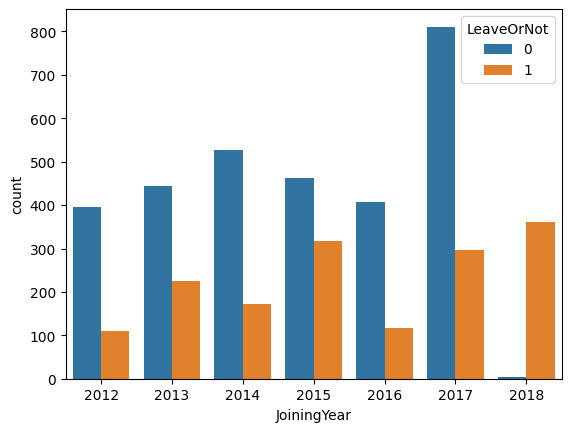

<Figure size 1400x1000 with 0 Axes>

In [24]:
sns.countplot(x = 'JoiningYear' , hue = 'LeaveOrNot', data = df)
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

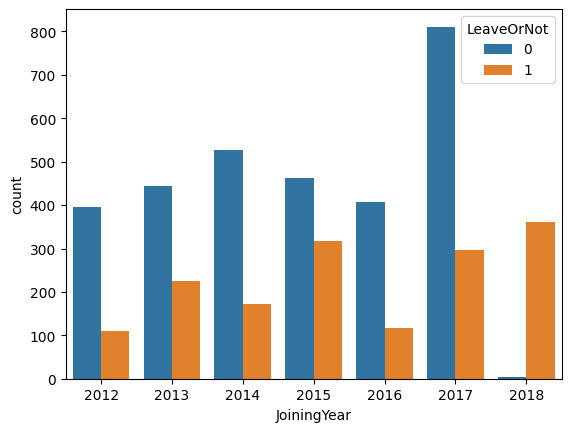

<Figure size 1400x1000 with 0 Axes>

In [18]:
sns.countplot(x = 'JoiningYear' , hue = 'LeaveOrNot', data = df)
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

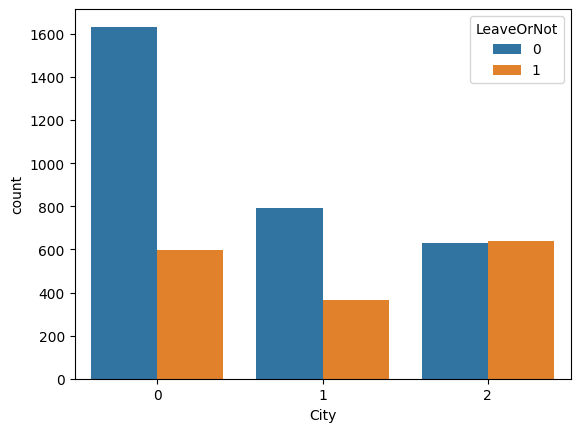

<Figure size 1400x1000 with 0 Axes>

In [26]:
sns.countplot(x = 'City' , hue = 'LeaveOrNot', data = df)
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

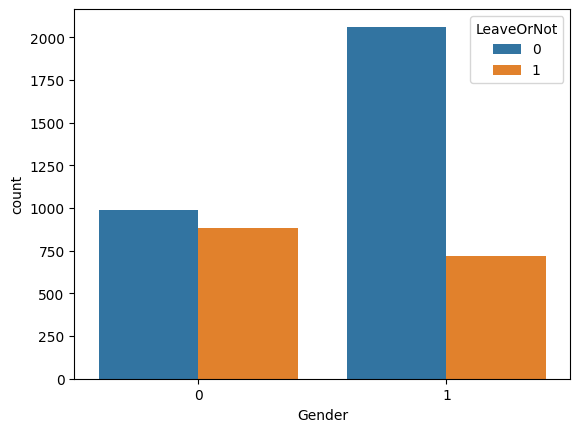

<Figure size 1400x1000 with 0 Axes>

In [19]:
sns.countplot(x= 'Gender', hue= 'LeaveOrNot', data = df)
plt.figure(figsize = (14,10))

<Figure size 1400x1000 with 0 Axes>

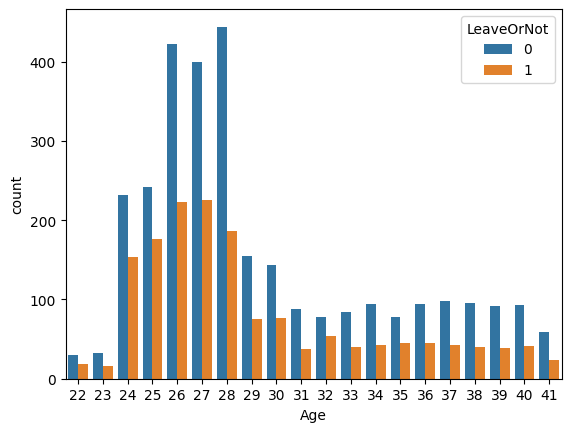

<Figure size 1400x1000 with 0 Axes>

In [20]:
sns.countplot(x = 'Age' , hue = 'LeaveOrNot', data = df)
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

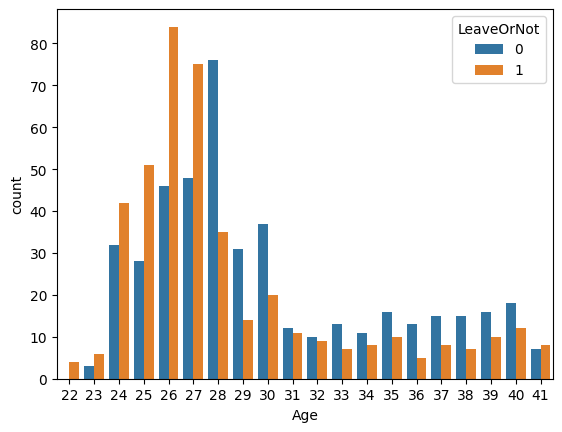

<Figure size 1400x1000 with 0 Axes>

In [29]:
sns.countplot(x = 'Age' , hue = 'LeaveOrNot', data = df.loc[df.Education == 1])
plt.figure(figsize = (14, 10))

In [21]:
x_train, X_test, y_train, Y_test = train_test_split(df.drop('LeaveOrNot', axis=1), df.LeaveOrNot, test_size=0.2, random_state= 23)

In [22]:
sv= svm.SVC(C=40, kernel = 'rbf')
sv.fit(x_train, y_train)

SVC(C=40)

In [23]:
sv.score(X_test, Y_test)

0.6433941997851772

In [24]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [25]:
rf.score(X_test, Y_test)

0.8453276047261009

In [27]:
y_predicted= rf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_predicted)
print (cm)

[[544  55]
 [ 89 243]]
